In [2]:
%matplotlib notebook

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


### ** Problem 7. Principal Component Analysis
Sometimes a projection of a higher-dimensional to a lower-dimensional space is useful. It's extremely useful if we want to get some visual understanding of a, say, 15D space, in 3D or even 2D. One algorithm which allows us to project multidimensional data into fewer dimensions **while keeping the most important shapes and structures** is called **principal component analysis** (PCA). You can explore this using the following checklist:
* What are eigenvalues and eigenvectors?
* What is the eigenbasis? What is the spectrum of a matrix?
* How do we compute the eigenvalues and eigenvectors of a matrix?
* What is projection?
* How does projection conserve some shapes? Think about an object casting a shadow
* How is the projection problem related to eigenvalues and eigenvectors?
* What is PCA?
* What are principal components? How many components are there (as a function of dimensions of the original space)?
* What is variance? What is explained variance?
* How do principal components relate to explained variance?
* How is PCA implemented? Implement and show
* Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images
* Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.

<IPython.core.display.Javascript object>


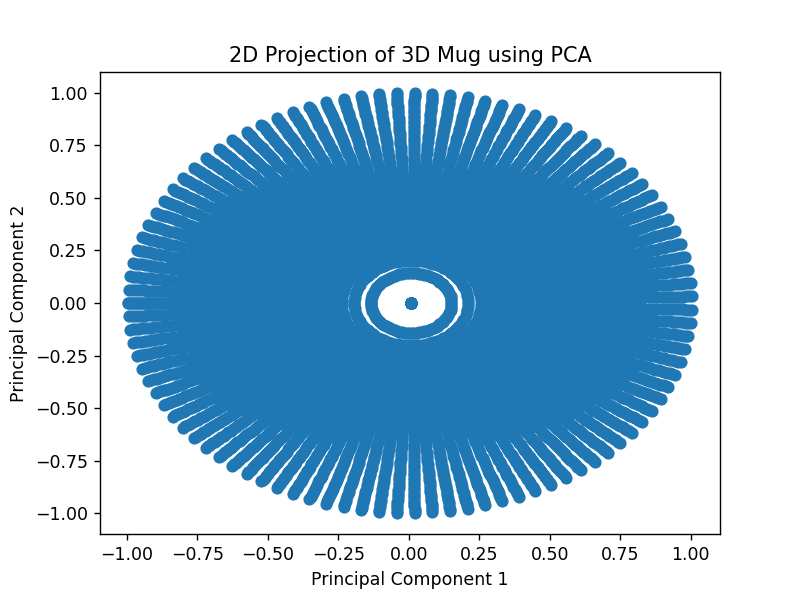

In [14]:
theta = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(0, 1, 50)
theta, z = np.meshgrid(theta, z)
r = np.sqrt(z)
x = r * np.cos(theta)
y = r * np.sin(theta)

# Flatten the mug shape to obtain a 2D dataset
mug_data = np.column_stack([x.flatten(), y.flatten(), z.flatten()])

pca = PCA(n_components=2)
mug_data_pca = pca.fit_transform(mug_data)

plt.scatter(mug_data_pca[:, 0], mug_data_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of 3D Mug using PCA')
plt.show()


<IPython.core.display.Javascript object>


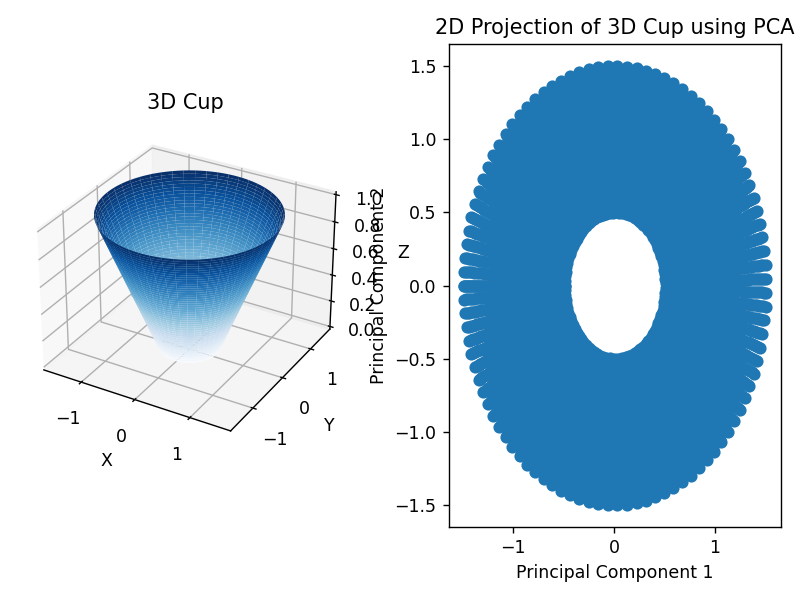

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Define the cup shape
theta = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(0, 1, 50)
theta, z = np.meshgrid(theta, z)
r = 0.5 + z
x = r * np.cos(theta)
y = r * np.sin(theta)

# Flatten the cup shape to obtain a 2D dataset
cup_data = np.column_stack([x.flatten(), y.flatten(), z.flatten()])

# Apply PCA to reduce the dimensionality from 3D to 2D
pca = PCA(n_components=2)
cup_data_pca = pca.fit_transform(cup_data)

# Create a 3D plot of the cup shape
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(x, y, z, cmap='Blues')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Cup')

# Create a 2D plot of the PCA projection
ax = fig.add_subplot(1, 2, 2)
ax.scatter(cup_data_pca[:, 0], cup_data_pca[:, 1])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D Projection of 3D Cup using PCA')

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


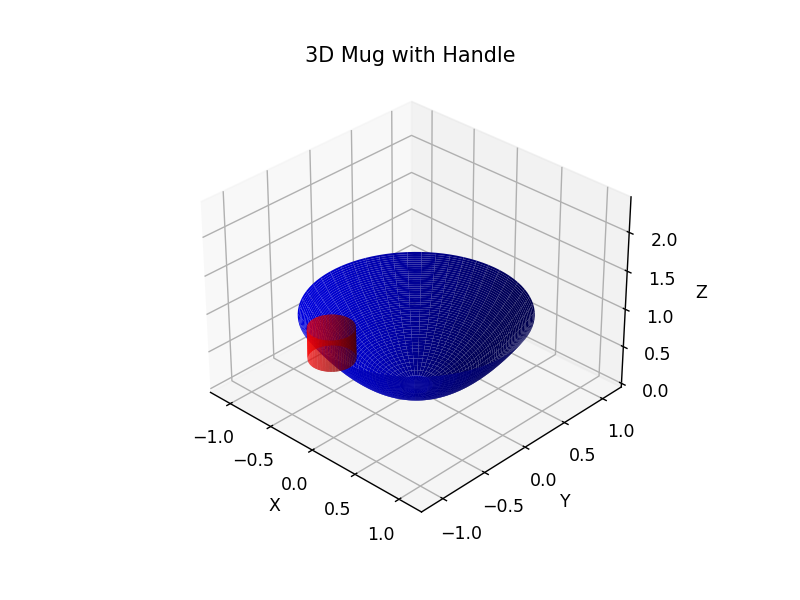

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the mug shape
theta = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(0, 1, 50)
theta, z = np.meshgrid(theta, z)
r = np.sqrt(z)
x = r * np.cos(theta)
y = r * np.sin(theta)

# Create the handle shape
handle_radius = 0.2
handle_length = 0.4
theta_handle = np.linspace(0, 2 * np.pi, 50)
z_handle = np.linspace(0, handle_length, 50)
theta_handle, z_handle = np.meshgrid(theta_handle, z_handle)
x_handle = handle_radius * np.cos(theta_handle)
y_handle = handle_radius * np.sin(theta_handle)

# Create a figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the mug surface
ax.plot_surface(x, y, z, color='b')

# Plot the handle surface
ax.plot_surface(x_handle, y_handle - 1, z_handle + 1, color='r')

# Set plot limits and labels
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_zlim(0, 2.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mug with Handle')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


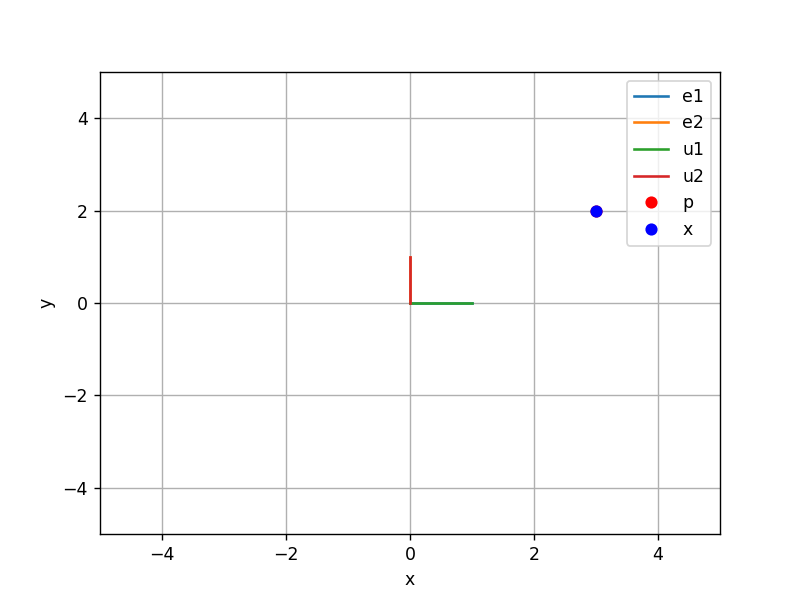

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the original basis vectors
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Define the new basis vectors
v1 = np.array([2, 1])
v2 = np.array([-1, 3])

# Define the coordinates of a point in the original basis as a column vector
p = np.array([[3], [2]])

# Define a function to update the plot
def update_plot(i):
    # Calculate the interpolation factor
    t = i / 1

    # Calculate the coordinates of the point in the new basis
    x = np.dot(np.array([v1, v2]).T, p) * t + np.dot(np.array([e1, e2]).T, p) * (1 - t)

    # Calculate the new basis vectors
    u1 = np.dot(np.array([v1, v2]).T, e1) * t + np.dot(np.array([e1, e2]).T, e1) * (1 - t)
    u2 = np.dot(np.array([v1, v2]).T, e2) * t + np.dot(np.array([e1, e2]).T, e2) * (1 - t)

    # Clear the plot
    plt.clf()

    # Create a plot with a grid and the original basis vectors
    plt.grid()
    plt.plot([0, e1[0]], [0, e1[1]], label="e1")
    plt.plot([0, e2[0]], [0, e2[1]], label="e2")

    # Add the new basis vectors to the plot
    plt.plot([0, u1[0]], [0, u1[1]], label="u1")
    plt.plot([0, u2[0]], [0, u2[1]], label="u2")

    # Plot the point in the original basis
    plt.plot(p[0], p[1], 'ro', label="p")

    # Plot the point in the new basis
    plt.plot(x[0], x[1], 'bo', label="x")

    # Add a legend to the plot
    plt.legend()

    # Set the axis limits and labels
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel("x")
    plt.ylabel("y")

# Create the animation
anim = FuncAnimation(plt.gcf(), update_plot, frames=2, interval=50)

# Show the animation
plt.show()

https://arxiv.org/pdf/1404.1100v1.pdf

https://allmodelsarewrong.github.io/pca.html

https://www.youtube.com/watch?v=dhK8nbtii6I
https://www.youtube.com/watch?v=EJG6gBeVdfw eigenbasis
https://www.youtube.com/watch?v=K-yDVqijSYw matrix spectrum


# What are eigenvalues and eigenvectors
Eigenvectors and the corresponding eigenvalues can only be calculated for transformations. Those vectors when transformed by the transformation matrix (that would be a square matrix) keep their orientation but get scaled by an eigenvalue. 

Taking the example bellow:

let us have a matrix: $$\left[
\begin{array}{ccc}
2 & -4 \\
-1 & -1 \\
\end{array}
\right] $$

the first column indicates where the $x$ unit vector goes and the second where the $y$ unit vector goes (we will call them $\hat{i}$ and $\hat{j}$). 

we then transform two vectors $\vec{v}=\left[
\begin{array}{ccc}
2\\
3\\
\end{array}
\right] $ and $\vec{e}=\left[
\begin{array}{ccc}
-4\\
1\\
\end{array}
\right] $

let’s calculate the new coordinates of this vectors after the transformation


In [38]:
matrix = np.array([[2, -4], [-1, -1]])
print(f'Old coordinates  for the first vector v:[2, 3]')
print(f'New coordinates  for the first vector v:{np.matmul(matrix,np.transpose(np.array([2,3])))}')
print(f'Old coordinates  for the second vector e:[-4, 1]')
print(f'New coordinates  for the second vector e:{np.matmul(matrix,np.transpose(np.array([-4,1])))}')

Old coordinates  for the first vector v:[2, 3]
New coordinates  for the first vector v:[-8 -5]
Old coordinates  for the second vector e:[-4, 1]
New coordinates  for the second vector e:[-12   3]


It is easy to see that the new coordinates of $\vec{e}$ are scaled x3 times, thus the main direction of the vector is kept the same. The eigen value in our case is $\lambda=3$.
The formula bellow indicates that a Transformation matrix applied on an eigenvector is the same as simply scaling the vector
$$ Av = \lambda v $$

### We can also say that every point on vector $\vec{e}$ is "linear combination" of -4 times $\hat{i}$ and 1 time $\hat{j}$ 


We can have: irrational eigenvalues and vectors, one value with infinite vectors etc..
those are all scenarios not described here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

def visualize_transformed_vector(matrix, vec, plot_title):
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors

    ax.quiver([0], [0], [vec[0]], [vec[1]], color = ["green"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    matrix = [
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ]
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

#     New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    new_vec = t.transform_affine(vec)

    ax.quiver([0, 0, 0], [0, 0, 0], [new_x[0], new_y[0], new_vec[0]], [new_x[1], new_y[1], new_vec[1]], color = ["red", "blue","green"], units = "xy", angles = "xy", scale = 1)
    plt.gca().set_aspect("equal")
    plt.show()

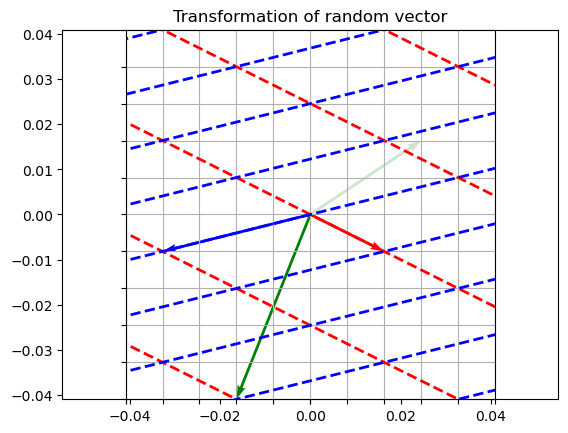

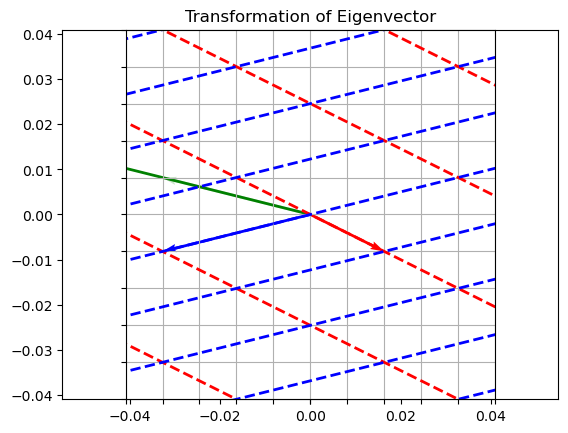

In [233]:
visualize_transformed_vector(matrix, [3, 2], "Transformation of random vector")
visualize_transformed_vector(matrix, [-4, 1], "Transformation of Eigenvector")

# What is the eigenbasis? 

This is when we take the eigenvectors of our Transformation and use them as basic (unit) vectors for a new coodinate system.

We need to have enough  linearly independent eigenvectors, so that their Span overlaps with the initial Space.

Let consider our first example 
Transformation: $$\left[
\begin{array}{ccc}
2 & -4 \\
-1 & -1 \\
\end{array}
\right] $$

   and two eigenvectors:  $\vec{e_1}=\left[
\begin{array}{ccc}
-4\\
1\\
\end{array}
\right] $  ,  $\vec{e_2}=\left[
\begin{array}{ccc}
-2\\
-2\\
\end{array}
\right] $

   eigenvalues: $\lambda_1 =3  ,  \lambda_2=-2$
   

[4 4]


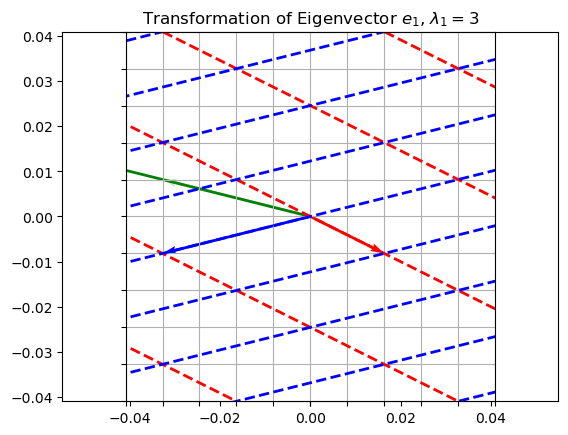

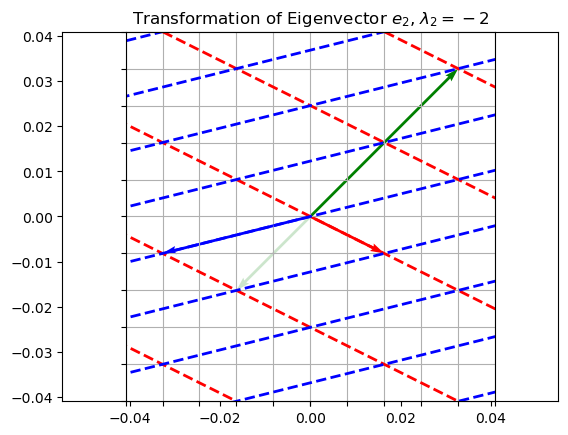

In [120]:
print(np.matmul(matrix,np.transpose(np.array([-2,-2]))))
visualize_transformed_vector(matrix, [-4, 1], "Transformation of Eigenvector $e_1$, $\lambda_1=3$")
visualize_transformed_vector(matrix, [-2, -2], "Transformation of Eigenvector $e_2$, $\lambda_2=-2$")

As $e_1$ and $e_2$ are independent vectors it is possible to describe any vector in our 2D Space using a linear combination of $e_1$ and $e_2$
this makes those two vectors good candidates for basic vecrots, as they are also eigenvectors we would call it eigenbasis.

When we transform a vector $\vec{v}=\left[
\begin{array}{ccc}
a\\
b\\
\end{array}
\right]$ with our matrix $A$ we can represent it as first transforming the basic (unit) vectors $\vec{i}$ and $\vec{j}$ to $\vec{\hat{i}}$ and $\vec{\hat{j}}$.

Then performing the linear combination of $a*\vec{\hat{i}} +b*\vec{\hat{j}}$ that will give us the transformed $\vec{\hat{v}}$

this can be easily recognized in the first graph "Transformation of random vector"

Let follow what is happening if we:

1/ switch to Eigenvector Basis. Use teh inverse Matrix created from the Eigenvectors
$$P^{-1}=\left[
\begin{array}{ccc}
-0.2 ,   0.2\\
-0.1 ,  -0.4\\
\end{array}
\right] $$

2/ execute the transformation 
$$D=\left[
\begin{array}{ccc}
3, 0\\
0, -2\\
\end{array}
\right] $$
3/ switch to Standard Basis
$$P=\left[
\begin{array}{ccc}
-4, -2\\
1, -2\\
\end{array}
\right] $$
this can be represented by the following 3 Matrix transformations

$$\left[
\begin{array}{ccc}
2 & -4 \\
-1 & -1 \\
\end{array}
\right] = PDP^{-1}$$


In [26]:
from numpy.linalg import inv

matrix = np.array([[1, 0], [0, 1]])
e1=np.transpose(np.array([2,-1]))
e2=np.transpose(np.array([-4,-1]))

e1=np.atleast_2d(e1).T
e2=np.atleast_2d(e2).T

D=np.array([[3,0],[0,3]])
P=np.concatenate((e1,e2), axis=1)
P_inv=inv(np.matrix(P))
# print(f'Vector e1=\n {e1}')
# print(f'Vector e2=\n {e2}')
# print(f'Matrix , converts Eigenbasis to Standard Basis  P=\n {P}')
# print(f'Matrix , Eigenvalues x I representing the transformasion in ErenSpace  D=\n {D}')
# print(f'Matrix , converts Standard Basis to Eigen Basis P^(-1)=\n {P_inv}')


In [20]:
#Proven here
g1=np.matmul(D,P_inv)
g2=np.matmul(P,g1)
print(f'PDP^-1 = \n{g2}')

PDP^-1 = 
[[3. 0.]
 [0. 3.]]


In [21]:
print(f' Coordinates of the transformed voctor [3,2] in standard bases: \n  {np.matmul(matrix,np.transpose(np.array([3,2])))}')

 Coordinates of the transformed voctor [3,2] in standard bases: 
  [9 6]


In [222]:
f1=np.matmul(P_inv,np.transpose(np.array([3,2])))
print(f'Show the cordinates of vector [3,2] in EigenSpace coordinates: \n {f1}')

f2=np.matmul(D,np.transpose(f1))
print(f'Show the cordinates after the transformation executed in the Eigen Space: \n{f2}')

f3=np.matmul(P,f2)
print(f'Show the coordinates of the transformed vector back in the Standard Space: \n {f3}')


Show the cordinates of vector [3,2] in EigenSpace coordinates: 
 [[-0.2 -1.1]]
Show the cordinates after the transformation executed in the Eigen Space: 
[[-0.6]
 [ 2.2]]
Show the coordinates of the transformed vector back in the Standard Space: 
 [[-2.]
 [-5.]]


In [198]:
# f1=np.matmul(np.transpose(np.array([3,2])),P_inv)
# f2=np.matmul(f1,D)
# f3=np.matmul(f2,P)
# print(f1,f2,f3,sep='\n')

[[-0.8 -0.2]]
[[-2.4  0.4]]
[[10.  4.]]


In [237]:
# g1=np.matmul(D,P_inv)
# g2=np.matmul(P,g1)
g3=np.matmul(g2,np.transpose(np.array([3,2])))

print(f'Coordinates of teh transformed vector when passing through teh Eigenspace: \n {g3}')

Coordinates of teh transformed vector when passing through teh Eigenspace: 
 [[-2. -5.]]


## why are the coordinates in two brackets [[]] ????????????????????????

in eigen basis system


In [32]:
v_e=np.matmul(P,np.transpose(np.array([3,2])))
v_e

array([-2, -5])

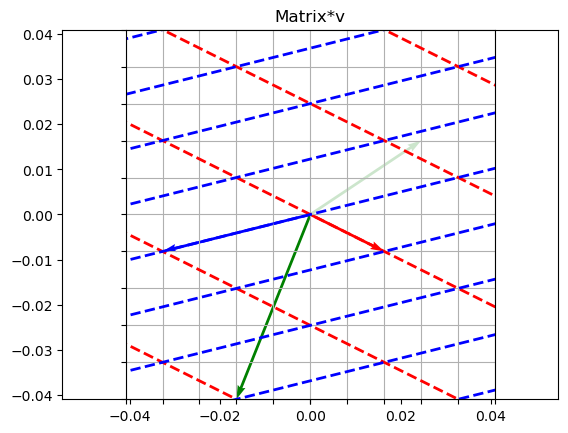

In [39]:
visualize_transformed_vector(matrix,[3,2],'Matrix*v')

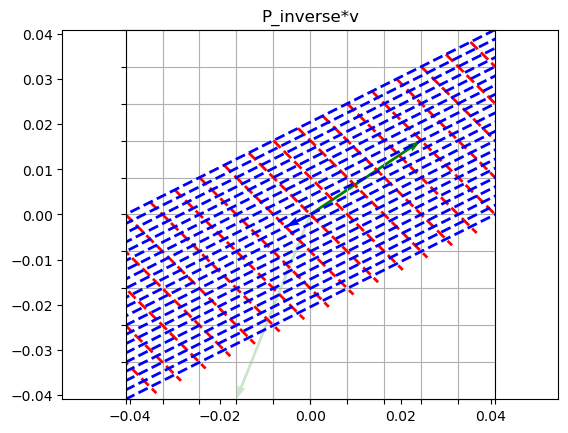

In [34]:

visualize_transformed_vector(np.array(P_inv),[-2, -5],'P_inverse*v')

[[ 0.5 -2. ]
 [-0.5 -1. ]]


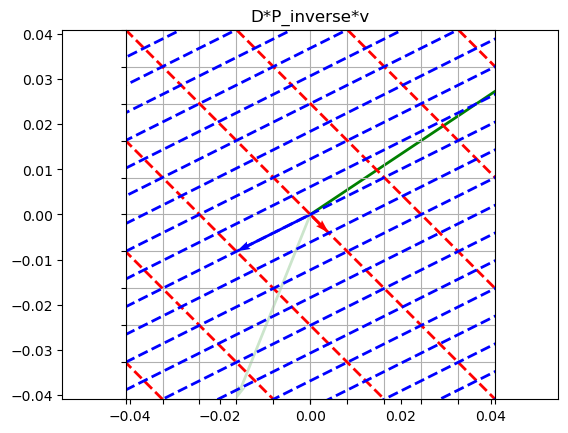

In [36]:
K=np.matmul(D,P_inv)
print(K)
visualize_transformed_vector(np.array(K),[-2,-5],'D*P_inverse*v')

[[-0.6 -0.4]
 [-0.3  0.8]]


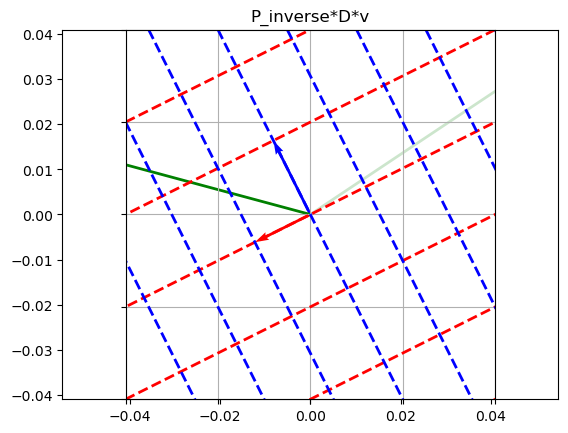

In [241]:
K1=np.matmul(P_inv,D)
print(K1)
visualize_eigen_basis(np.array(K1),[3,2],'P_inverse*D*v')

[[ 2. -4.]
 [-1. -1.]]


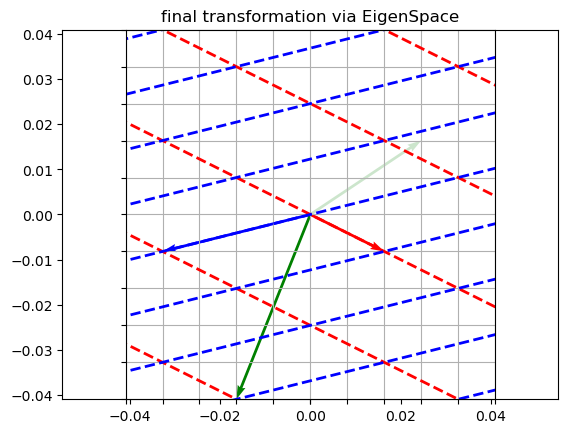

In [245]:
J=np.matmul(P,K)
print(J)
visualize_transformed_vector(np.array(J),[3,2],'final transformation via EigenSpace')

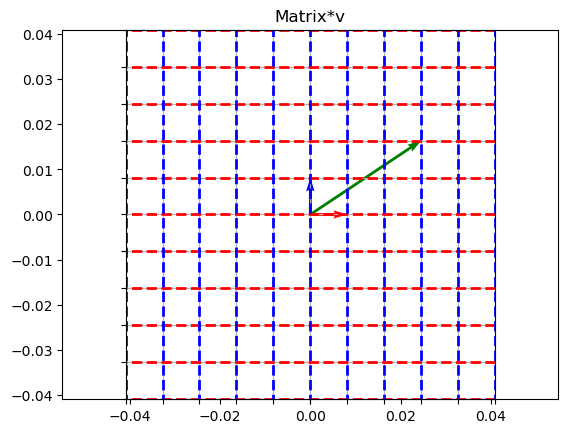

In [37]:
visualize_transformed_vector(matrix,[3,2],'Matrix*v')

array([-12,   3])

In [1]:
def visualize_eigen_basis(matrix, vec, plot_title):
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors

    ax.quiver([0], [0], [vec[0]], [vec[1]], color = ["green"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    matrix = [
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ]
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

#     New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    new_vec = t.transform_affine(vec)

    ax.quiver([0, 0, 0], [0, 0, 0], [new_x[0], new_y[0], new_vec[0]], [new_x[1], new_y[1], new_vec[1]], color = ["red", "blue","green"], units = "xy", angles = "xy", scale = 1)
    plt.gca().set_aspect("equal")
    plt.show()

# What is the spectrum of a matrix?

This is the set of all Eigenvalues $\lambda$ for a matrix $A$.

where : $ Av = \lambda v $

the Spectrum an be represented as : $\Lambda (A)=\{\lambda_0,\lambda_1,...\}$


In [81]:
import numpy as np
from numpy.linalg import inv



In [68]:
a= 1/np.sqrt(2)
a1=1/np.sqrt(2)
u1= np.array([0.5,0.5,-0.5])
u1= np.atleast_2d(u1).T
u2= np.array([[a1],[a1],[0]])   
# print(u1,u2, sep='\n')

b=np.array([[1],[2],[3]])

In [70]:
Q= np.concatenate((u1,u2),axis=1)
Qt=np.transpose(Q)
print(Q,Qt,sep='\n')

[[ 0.57735027  0.70710678]
 [-0.57735027  0.70710678]
 [ 0.          0.        ]]
[[ 0.57735027 -0.57735027  0.        ]
 [ 0.70710678  0.70710678  0.        ]]


In [78]:
A=np.matmul(Q,Qt)

In [84]:
A

array([[0.83333333, 0.16666667, 0.        ],
       [0.16666667, 0.83333333, 0.        ],
       [0.        , 0.        , 0.        ]])

In [72]:
np.matmul(Qt,Q)

array([[ 6.66666667e-01, -1.77961928e-17],
       [-1.77961928e-17,  1.00000000e+00]])

In [73]:
P=np.dot(Q,Qt)

In [74]:
np.matmul(P,b)

array([[1.16666667],
       [1.83333333],
       [0.        ]])

In [86]:
k = np.array([[1., 2.], [3., 4.]])
inv(k)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])